In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests as rqst

In [3]:
# make a function that generates a vector series of random walks
def make_random_walks(n_walks: int, n_steps: int, start: float = 100.0, step_size: float = 1.0) -> pd.DataFrame:
    """
    Generate a DataFrame of random walks.
    
    Parameters:
    n_walks (int): Number of random walks to generate.
    n_steps (int): Number of steps in each random walk.
    start (float): Starting value for each walk.
    step_size (float): Maximum size of each step.
    
    Returns:
    pd.DataFrame: DataFrame where each column is a random walk.
    """
    walks = {}
    for i in range(n_walks):
        steps = np.random.uniform(-step_size, step_size, n_steps)
        walk = np.cumsum(np.insert(steps, 0, start))
        walks[f'walk_{i+1}'] = walk
    return pd.DataFrame(walks)

In [4]:
def save_walks_to_csv(walks: pd.DataFrame, filename: str) -> None:
    """
    Save the random walks DataFrame to a CSV file.
    
    Parameters:
    walks (pd.DataFrame): DataFrame of random walks.
    filename (str): Name of the CSV file to save.
    """
    save_dir = 'data/random_walks'
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.join(save_dir, filename)
    walks.to_csv(filename, index=False)
    print(f"Random walks saved to {filename}")
    return filename

In [5]:
def make_individual_walk_plot(walk: pd.Series, title) -> plt.Figure:
    """
    Create a plot for an individual random walk.
    
    Parameters:
    walk (pd.Series): Series representing the random walk.
    title (str, optional): Title of the plot.
    
    Returns:
    plt.Figure: Matplotlib Figure object of the plot.
    """
    fig, ax = plt.subplots()
    ax.plot(walk, marker='o', linestyle='-')
    ax.set_xlabel('Step')
    ax.set_ylabel('Value')
    if title:
        ax.set_title(title)
    # Save the figure to a file
    save_dir = 'data/random_walks'
    os.makedirs(save_dir, exist_ok=True)
    fig_filename = os.path.join(save_dir, f"{title.replace(' ', '_')}.png")
    fig.savefig(fig_filename)
    print(f"Plot saved to {fig_filename}")  
    return fig 

Random walks saved to data/random_walks/random_walks.csv
Plot saved to data/random_walks/walk_1.png
Plot saved to data/random_walks/walk_2.png
Plot saved to data/random_walks/walk_3.png
Plot saved to data/random_walks/walk_4.png
Plot saved to data/random_walks/walk_5.png
Plot saved to data/random_walks/Target_Variable.png


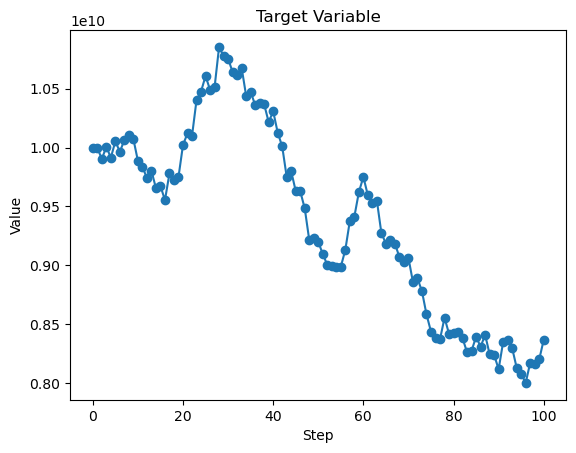

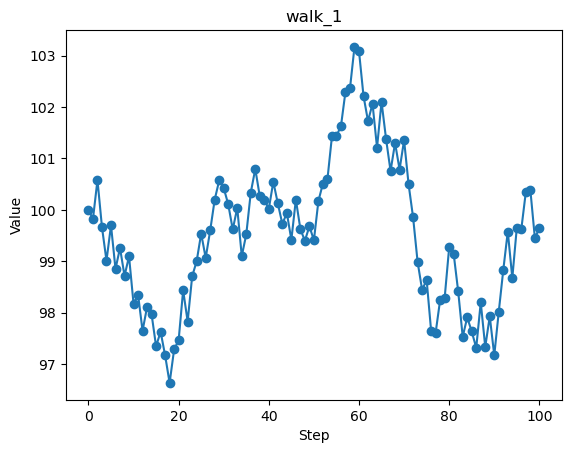

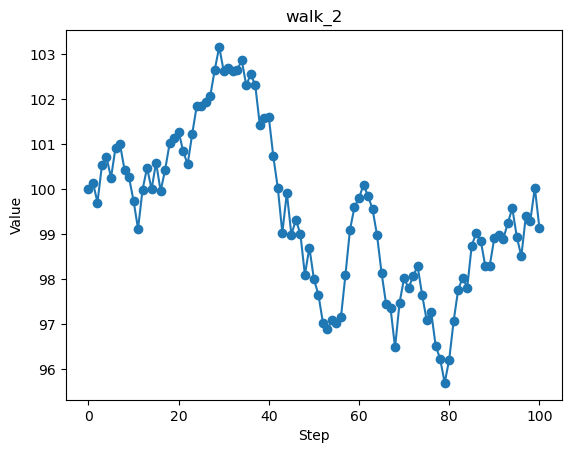

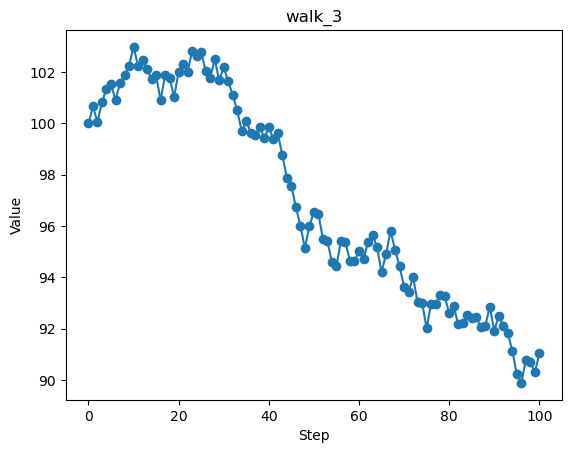

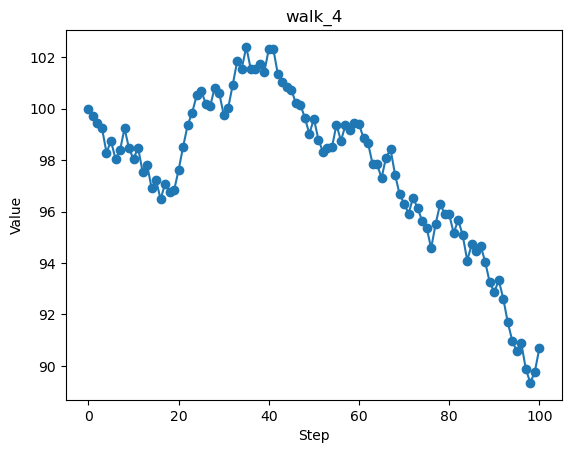

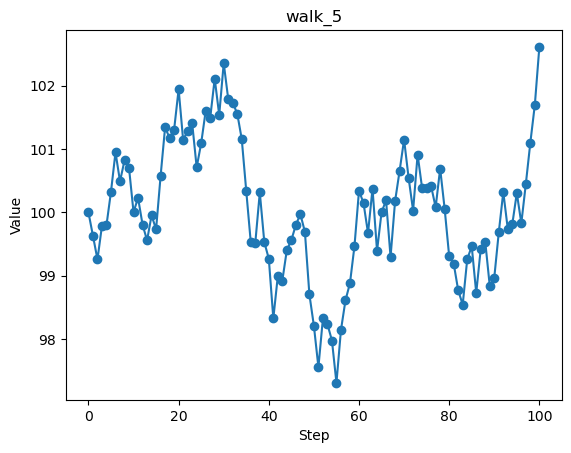

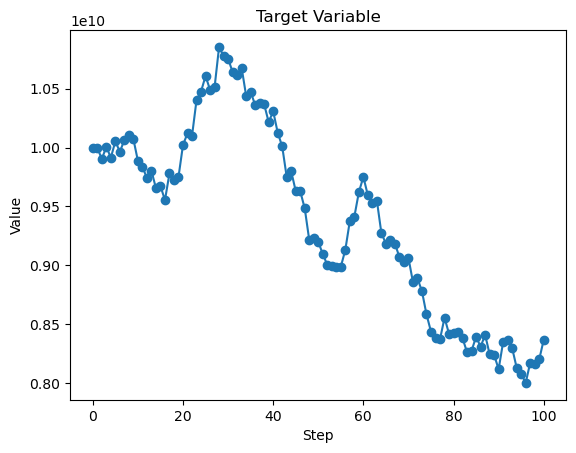

In [11]:
walks = make_random_walks(n_walks=5, n_steps=100, start=100.0, step_size=1.0)
csv_filename = save_walks_to_csv(walks, 'random_walks.csv')
for col in walks.columns:
    make_individual_walk_plot(walks[col], title=col)

# Plot the product of all random walks
product_walk = walks.prod(axis=1)
make_individual_walk_plot(product_walk, title='Target Variable')


In [19]:
# Read in the Tesla Data
TSLA_SR = pd.read_csv('/Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/short_interest/TSLA_SR.csv')
TSLA_SR['Date'] = pd.to_datetime(TSLA_SR['Settlement Date'])
TSLA_SR.head()

,Settlement Date,Issue Name,Symbol,Market,Current Short,Previous Short,Chg,% Change from Previous,Avg Daily Vol,Days to Cover,Revision Flag,Date
0,2025-08-29,"Tesla, Inc. Common Stock",TSLA,NNM,78272760,76710309,1562451,2.04,73523676,1.06,NaN,2025-08-29
1,2025-08-15,"Tesla, Inc. Common Stock",TSLA,NNM,76710309,71986527,4723782,6.56,78466917,1.00,NaN,2025-08-15
2,2025-07-31,"Tesla, Inc. Common Stock",TSLA,NNM,71986527,69962139,2024388,2.89,98402157,1.00,NaN,2025-07-31
3,2025-07-15,"Tesla, Inc. Common Stock",TSLA,NNM,69962139,80074233,-10112094,-12.63,96775833,1.00,NaN,2025-07-15
4,2025-06-30,"Tesla, Inc. Common Stock",TSLA,NNM,80074233,77096746,2977487,3.86,104302063,1.00,NaN,2025-06-30


Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/short_interest/TSLA_Short_Interest.png


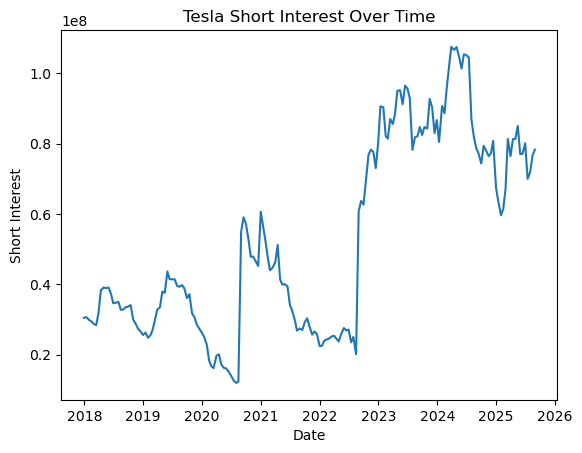

In [22]:
TSLA_SR.head()
# Plot, and save, the Tesla Short Interest Data
fig, ax = plt.subplots()
ax.plot(TSLA_SR['Date'], TSLA_SR['Current Short'], linestyle='-')
ax.set_xlabel('Date')
ax.set_ylabel('Short Interest')
ax.set_title('Tesla Short Interest Over Time')
fig_filename = '/Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/short_interest/TSLA_Short_Interest.png'
fig.savefig(fig_filename)
print(f"Plot saved to {fig_filename}")  

Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/short_interest/TSLA_Short_Interest_Change.png


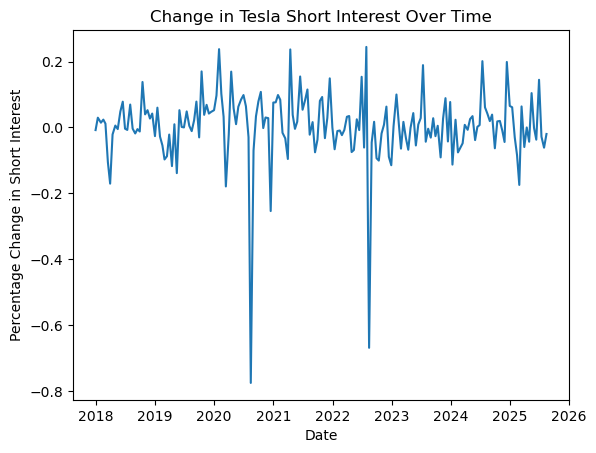

In [ ]:
# Now plot the change in short interest over time
TSLA_SR['Short Change'] = TSLA_SR['Current Short'].pct_change()
fig, ax = plt.subplots()
ax.plot(TSLA_SR['Date'], TSLA_SR['Short Change'], linestyle='-')
ax.set_xlabel('Date')
ax.set_ylabel('Percentage Change in Short Interest')
ax.set_title('Change in Tesla Short Interest Over Time')
fig_filename = '/Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/short_interest/TSLA_Short_Interest_Change.png'
fig.savefig(fig_filename)
print(f"Plot saved to {fig_filename}")  

In [17]:
# We need to make all the dataframes for each stock contained in the all_stocks.csv file
all_stocks = pd.read_csv('/Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/all_stocks.csv')
# The stocks are seperated by their permnos
for permno in all_stocks['PERMNO'].unique():
    stock_df = all_stocks[all_stocks['PERMNO'] == permno]
    stock_df.columns = ['stock_id', 'date', 'dividend_cash_amount', 'price', 'volume', 'return_daily', 'cumulative_price_adjustment_factor', 'number_of_trades_daily', 'SP_composite_return_daily']
    stock_filename = f'stock_{permno}.csv'
    stock_df['date'] = pd.to_datetime(stock_df['date'])
    stock_df['return_daily'] = pd.to_numeric(stock_df['return_daily'], errors='coerce')
    save_walks_to_csv(stock_df, stock_filename)

Random walks saved to data/random_walks/stock_13407.csv
Random walks saved to data/random_walks/stock_14593.csv
Random walks saved to data/random_walks/stock_19788.csv
Random walks saved to data/random_walks/stock_21413.csv
Random walks saved to data/random_walks/stock_84788.csv
Random walks saved to data/random_walks/stock_86580.csv
Random walks saved to data/random_walks/stock_93436.csv


/var/folders/rj/5g33_hpx1qb2bxw69trv3pqr0000gn/T/ipykernel_5752/3420910383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['date'] = pd.to_datetime(stock_df['date'])
/var/folders/rj/5g33_hpx1qb2bxw69trv3pqr0000gn/T/ipykernel_5752/3420910383.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['return_daily'] = pd.to_numeric(stock_df['return_daily'], errors='coerce')
/var/folders/rj/5g33_hpx1qb2bxw69trv3pqr0000gn/T/ipykernel_5752/3420910383.py:8: SettingWithCopyWarning: 
A value is tryin

/var/folders/rj/5g33_hpx1qb2bxw69trv3pqr0000gn/T/ipykernel_5752/213395204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['date'] = pd.to_datetime(stock_df['date'])


Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_13407_dividend_cash_amount.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_13407_price.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_13407_volume.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_13407_return_daily.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_13407_cumulative_price_adjustment_factor.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_13407_number_of_trades_daily.png
Plot saved to /User

/var/folders/rj/5g33_hpx1qb2bxw69trv3pqr0000gn/T/ipykernel_5752/213395204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['date'] = pd.to_datetime(stock_df['date'])


Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_14593_number_of_trades_daily.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_14593_SP_composite_return_daily.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_19788_dividend_cash_amount.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_19788_price.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_19788_volume.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_19788_return_daily.png
Plot saved to /Users/joshuac

/var/folders/rj/5g33_hpx1qb2bxw69trv3pqr0000gn/T/ipykernel_5752/213395204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['date'] = pd.to_datetime(stock_df['date'])
/var/folders/rj/5g33_hpx1qb2bxw69trv3pqr0000gn/T/ipykernel_5752/213395204.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_19788_number_of_trades_daily.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_19788_SP_composite_return_daily.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_21413_dividend_cash_amount.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_21413_price.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_21413_volume.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_21413_return_daily.png


/var/folders/rj/5g33_hpx1qb2bxw69trv3pqr0000gn/T/ipykernel_5752/213395204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['date'] = pd.to_datetime(stock_df['date'])


Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_21413_cumulative_price_adjustment_factor.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_21413_number_of_trades_daily.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_21413_SP_composite_return_daily.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_84788_dividend_cash_amount.png


/var/folders/rj/5g33_hpx1qb2bxw69trv3pqr0000gn/T/ipykernel_5752/213395204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['date'] = pd.to_datetime(stock_df['date'])


Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_84788_price.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_84788_volume.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_84788_return_daily.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_84788_cumulative_price_adjustment_factor.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_84788_number_of_trades_daily.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_84788_SP_composite_return_daily.png


/var/folders/rj/5g33_hpx1qb2bxw69trv3pqr0000gn/T/ipykernel_5752/213395204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['date'] = pd.to_datetime(stock_df['date'])


Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_86580_dividend_cash_amount.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_86580_price.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_86580_volume.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_86580_return_daily.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_86580_cumulative_price_adjustment_factor.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_86580_number_of_trades_daily.png
Plot saved to /User

/var/folders/rj/5g33_hpx1qb2bxw69trv3pqr0000gn/T/ipykernel_5752/213395204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['date'] = pd.to_datetime(stock_df['date'])


Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_93436_number_of_trades_daily.png
Plot saved to /Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_93436_SP_composite_return_daily.png


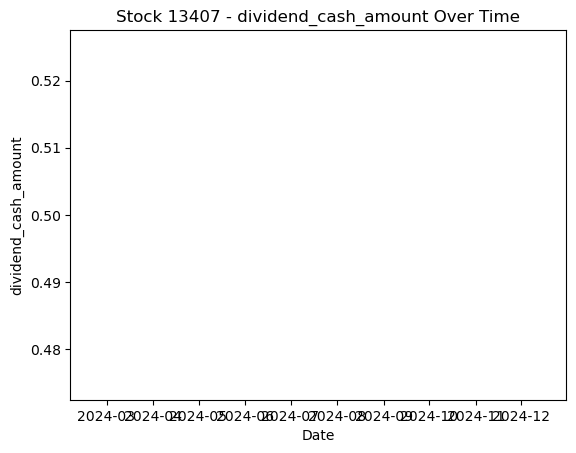

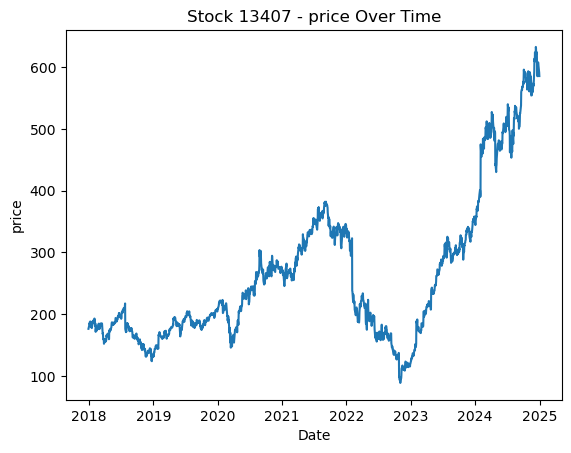

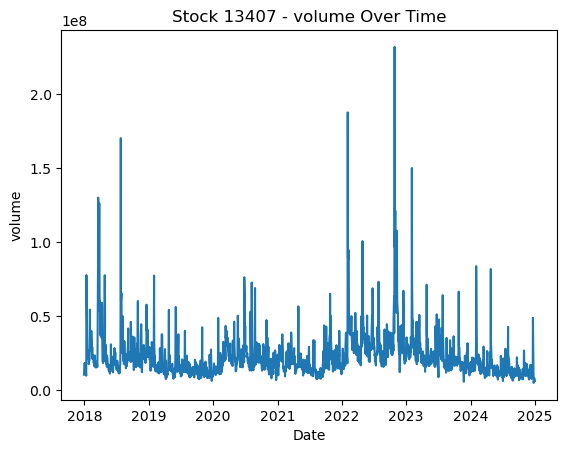

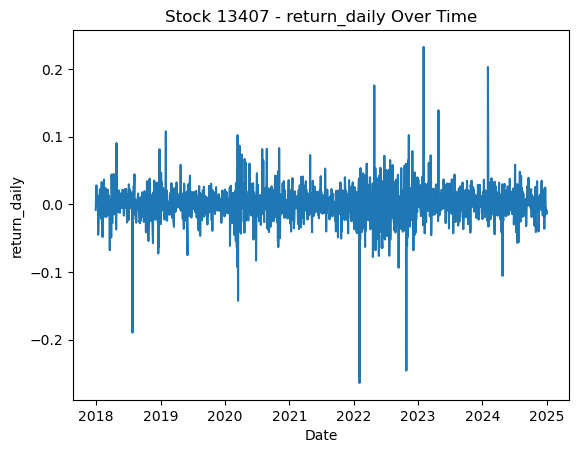

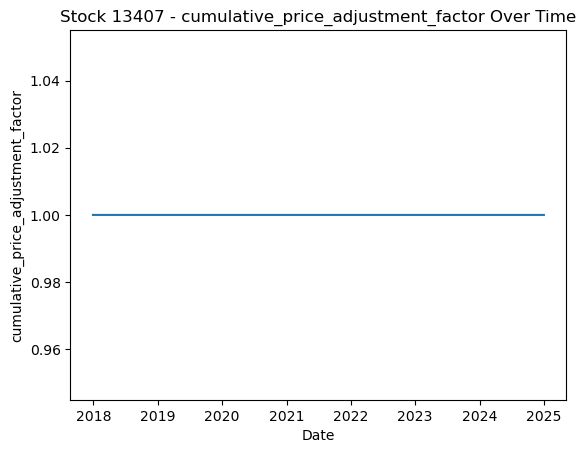

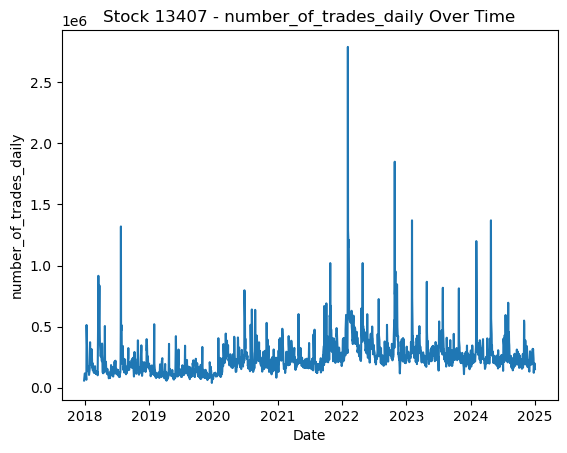

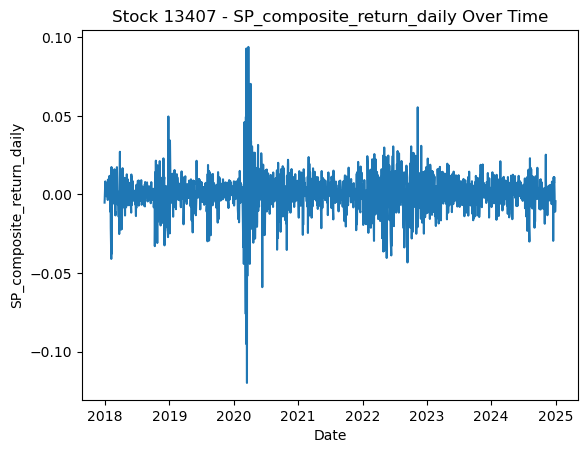

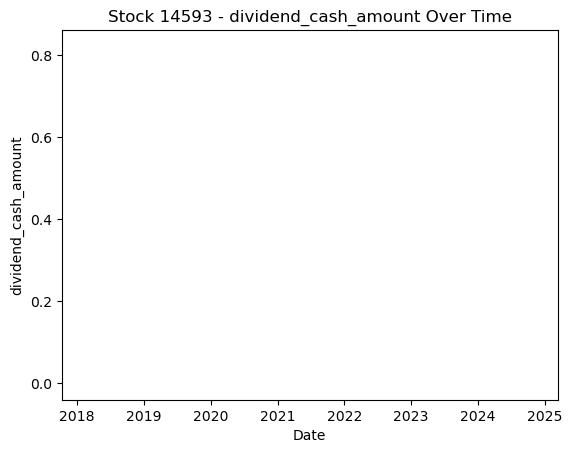

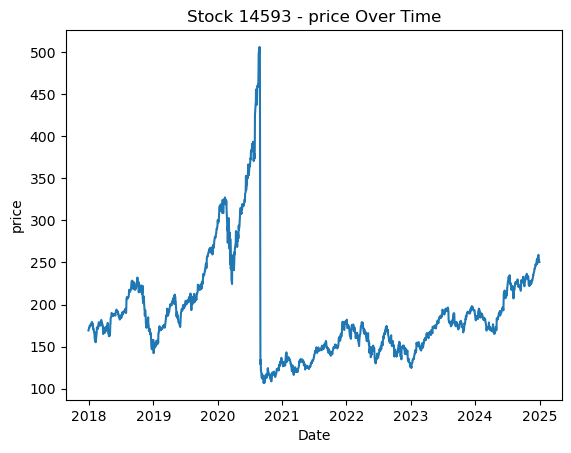

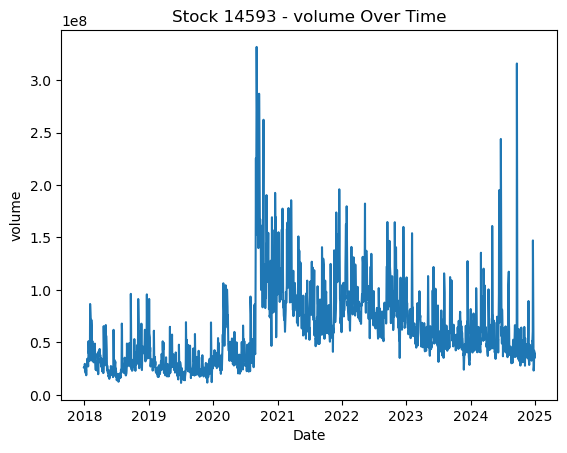

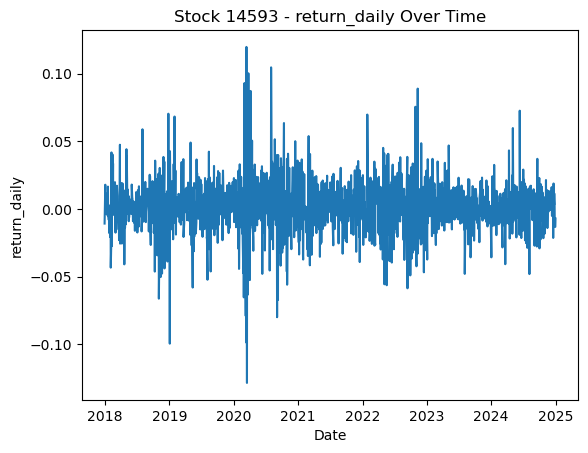

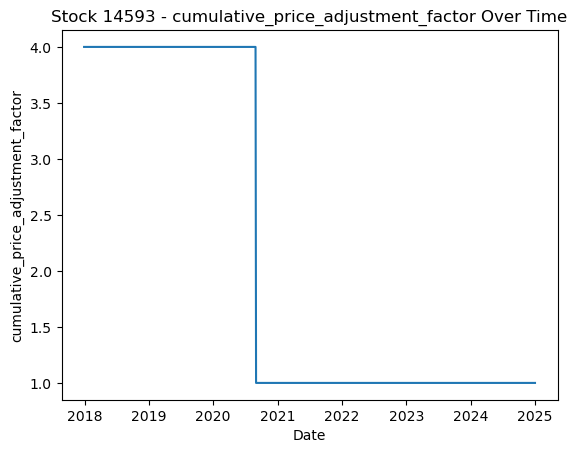

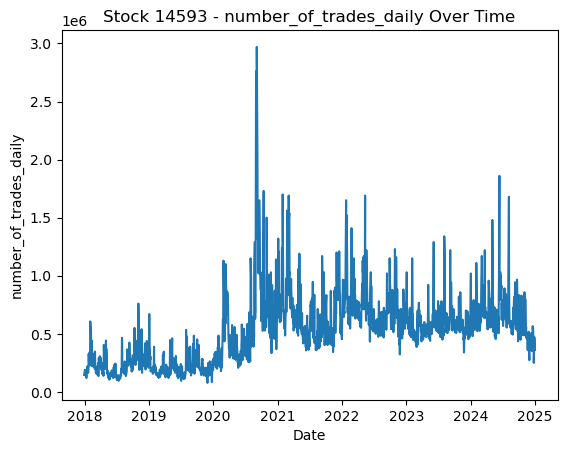

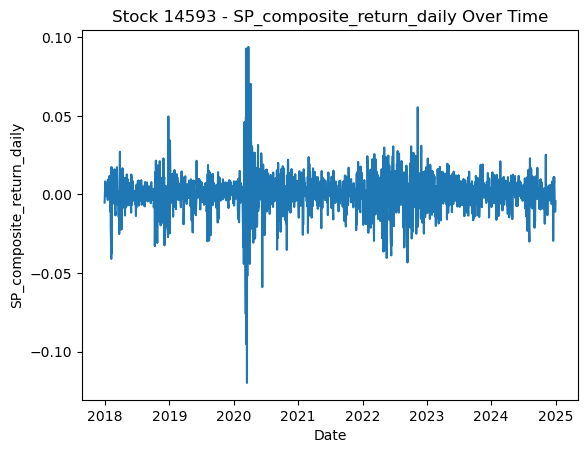

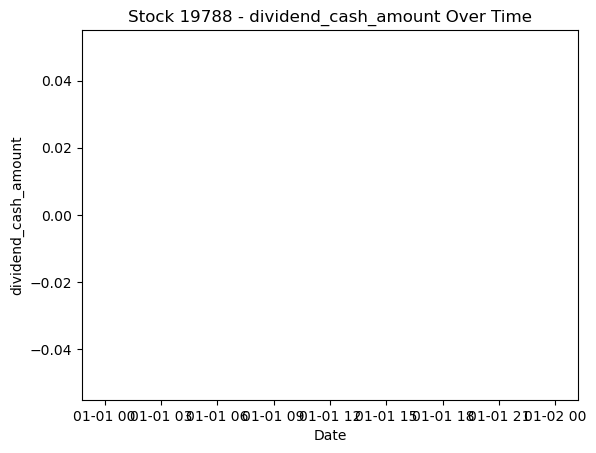

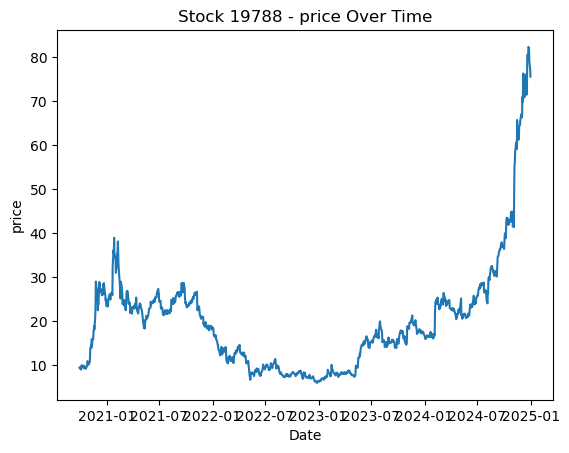

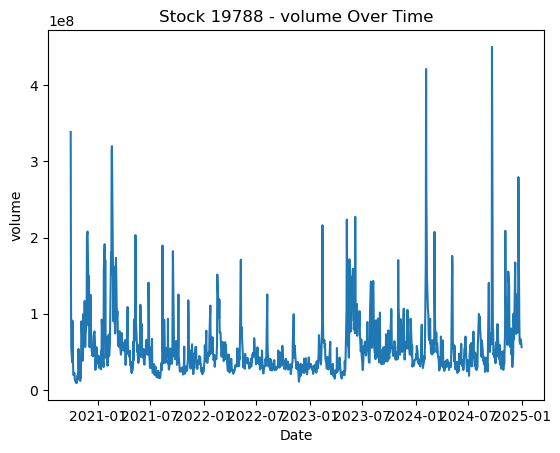

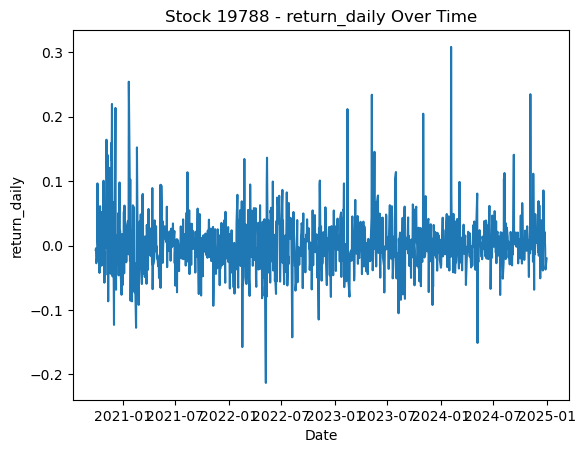

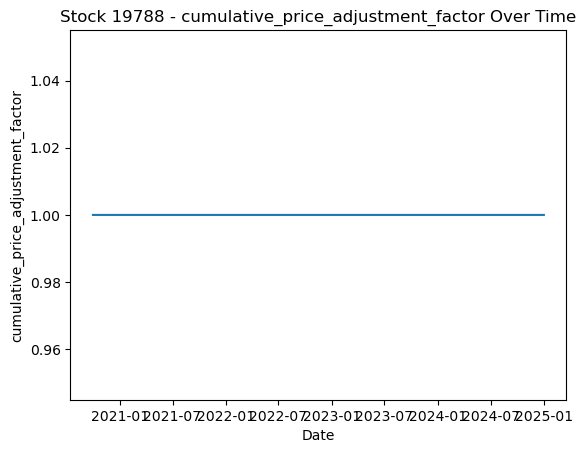

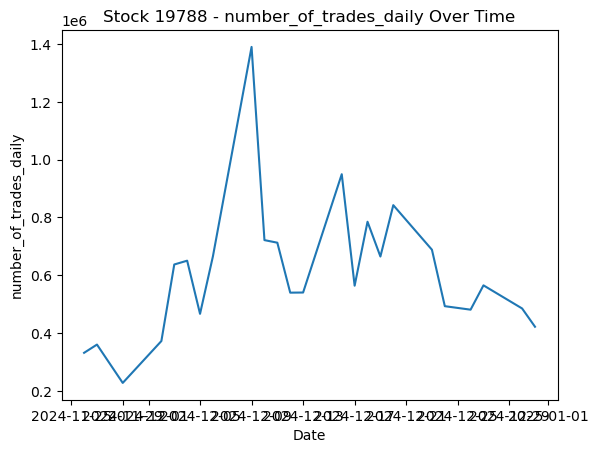

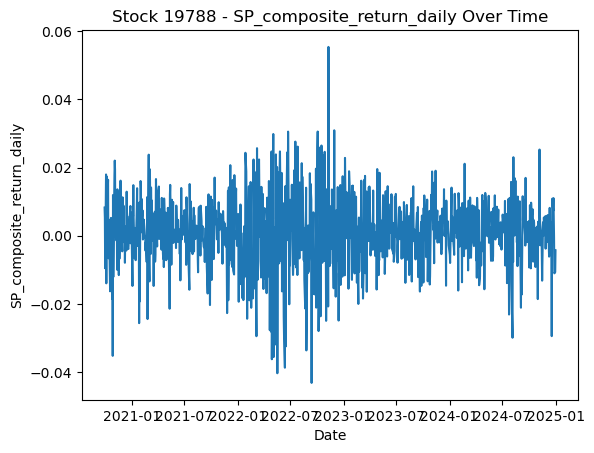

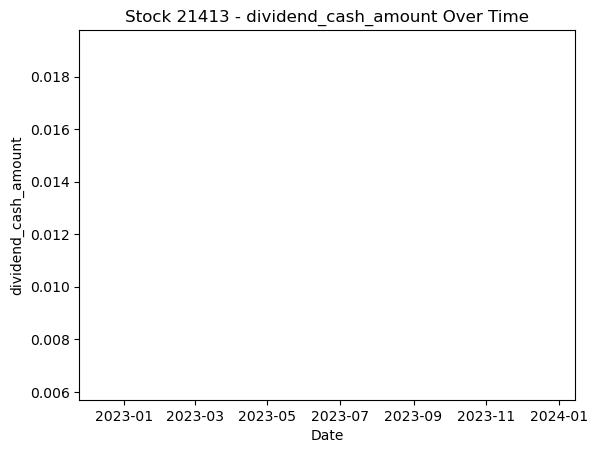

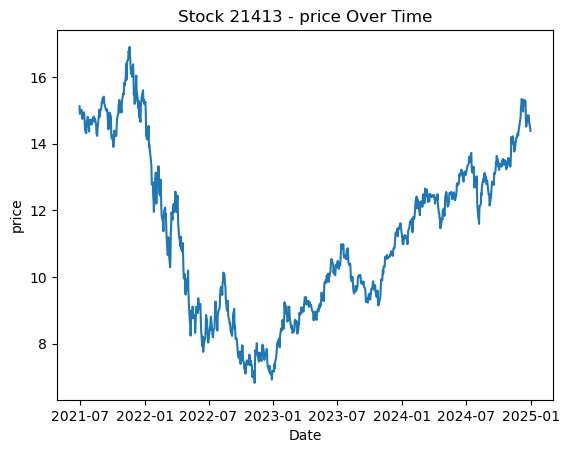

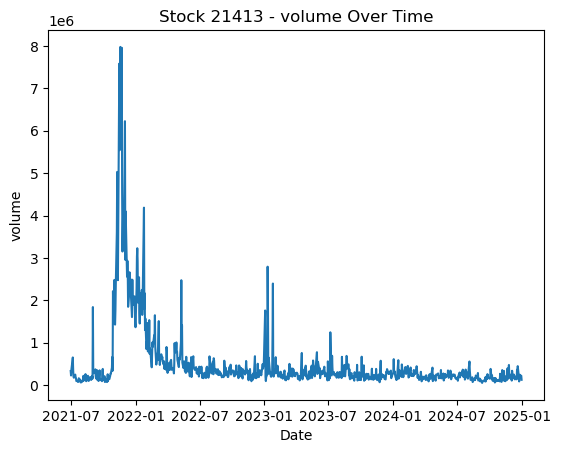

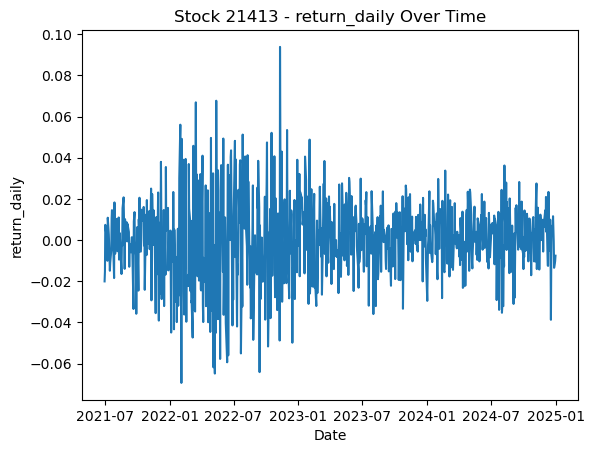

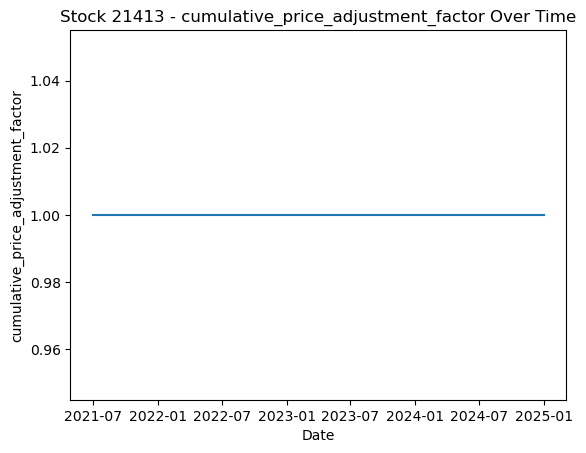

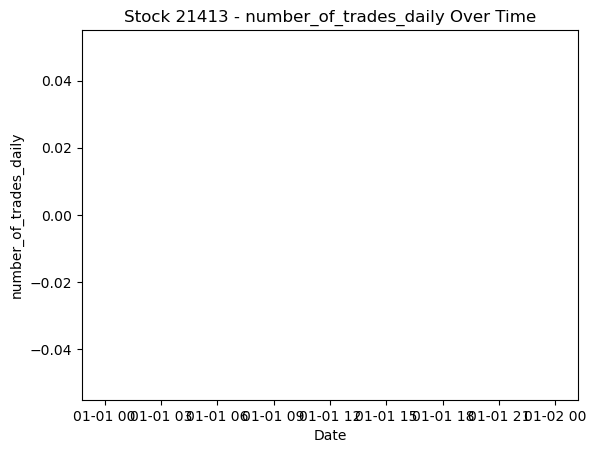

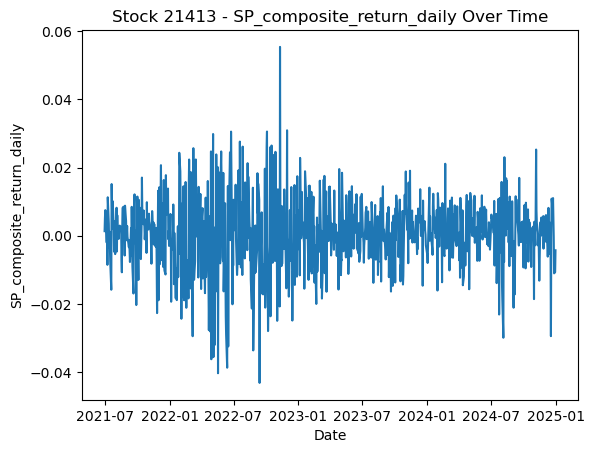

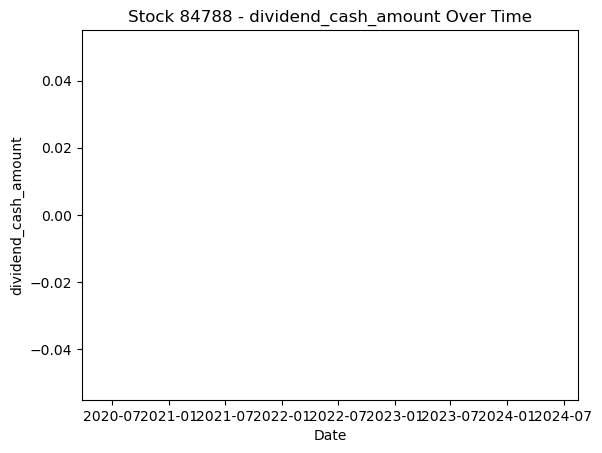

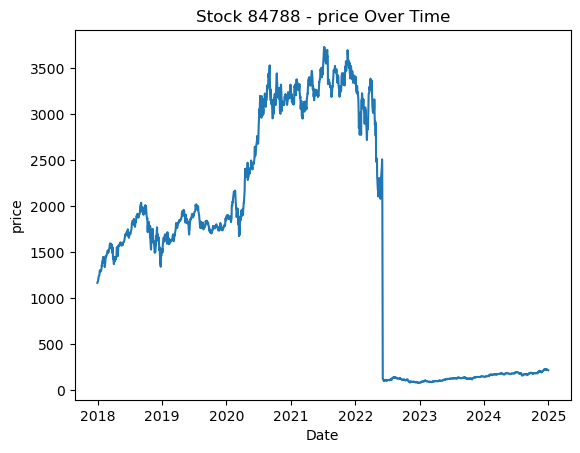

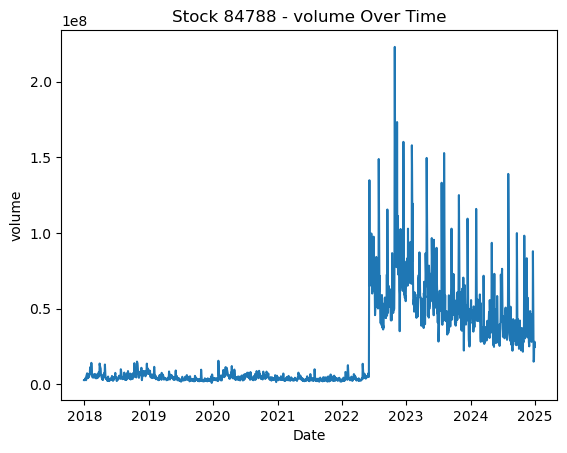

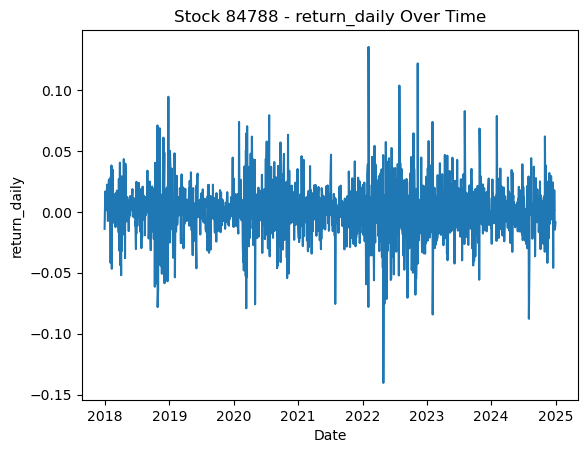

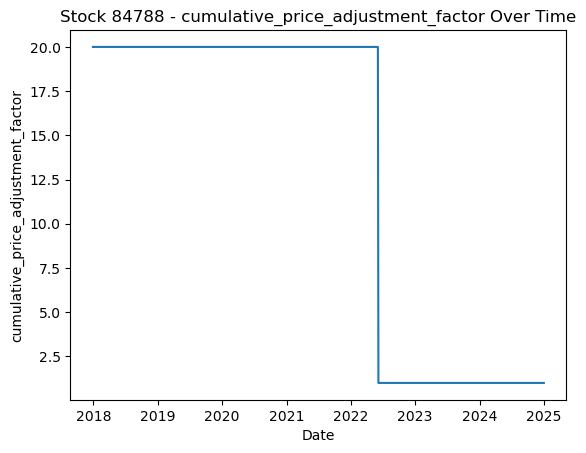

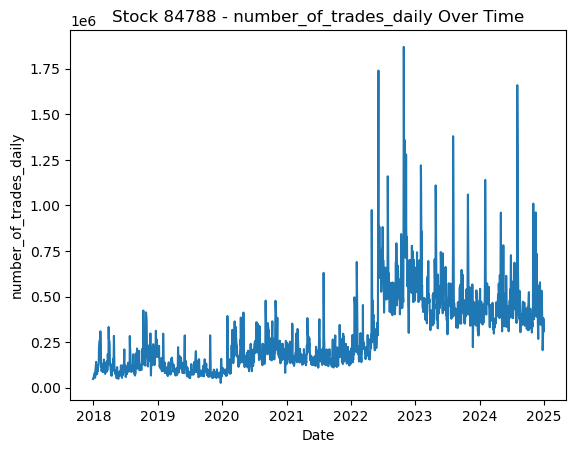

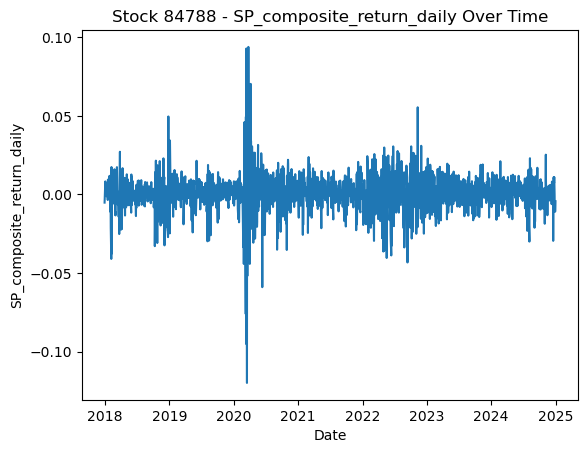

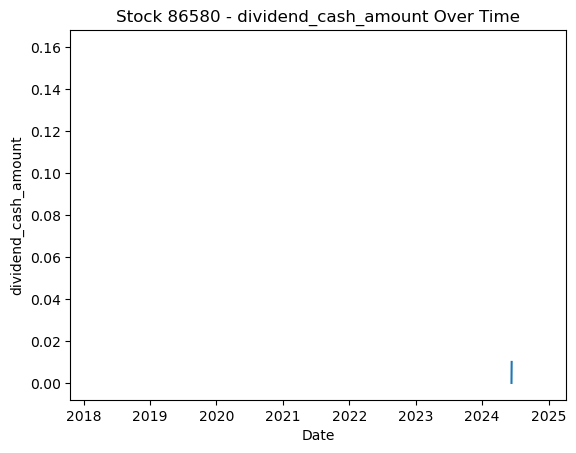

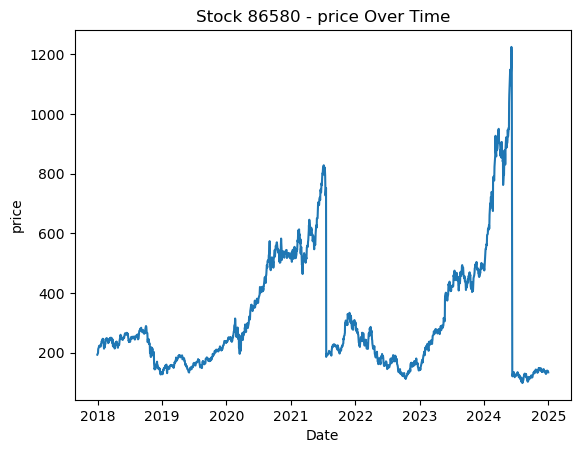

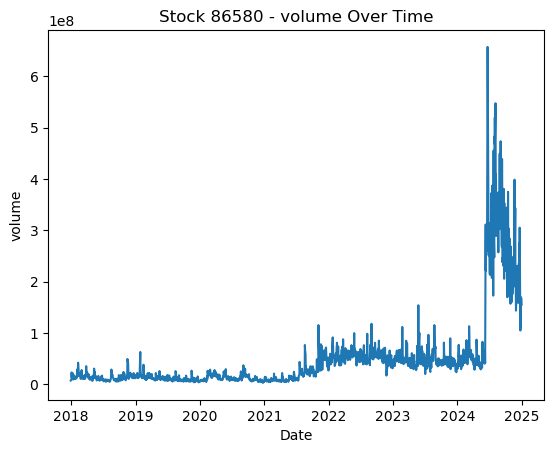

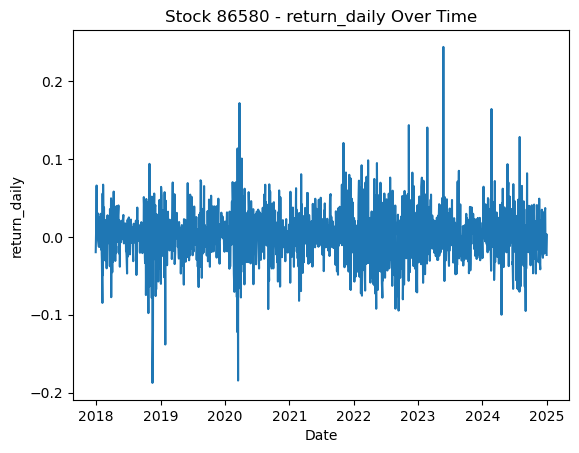

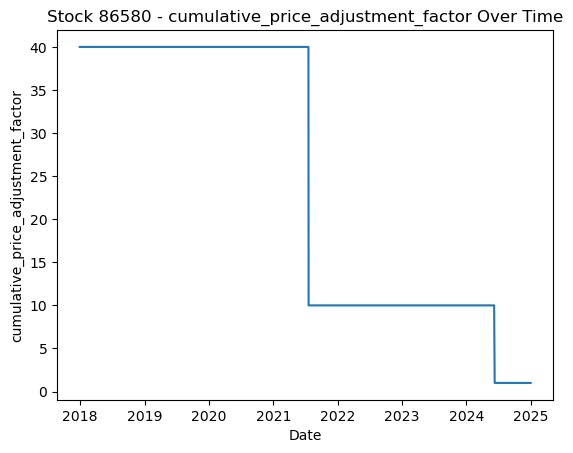

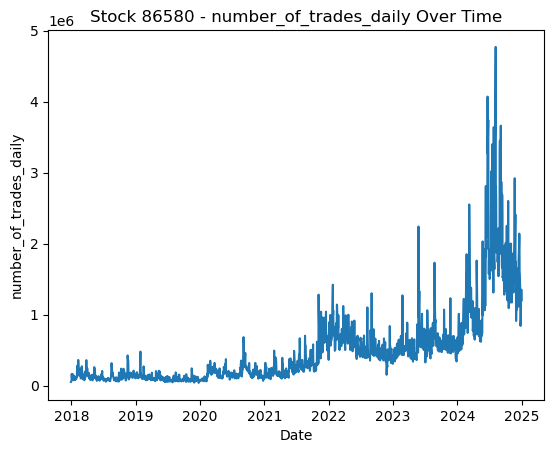

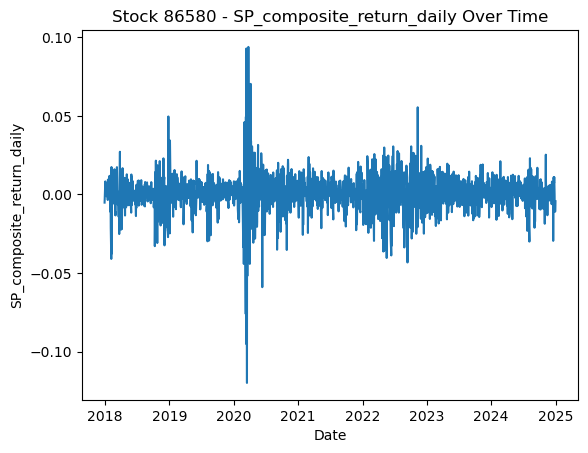

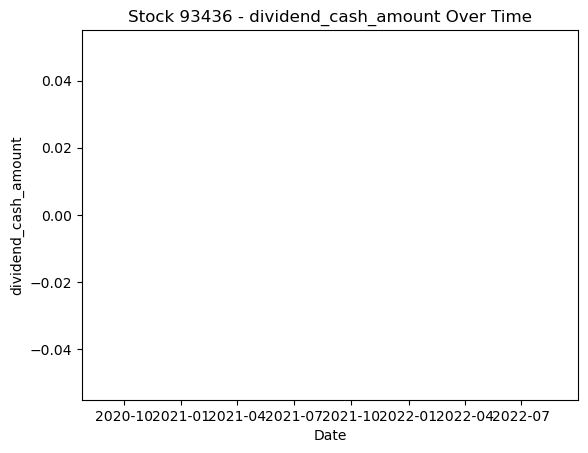

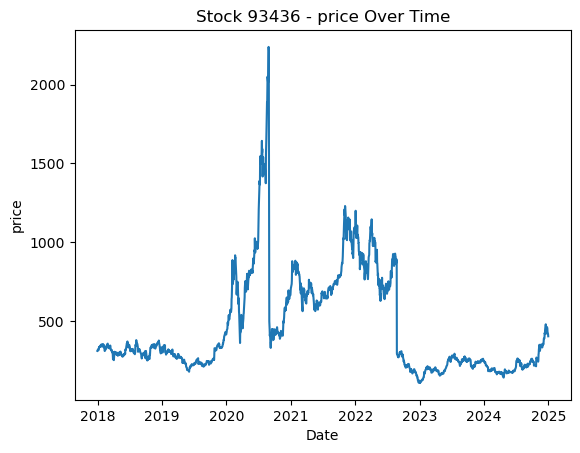

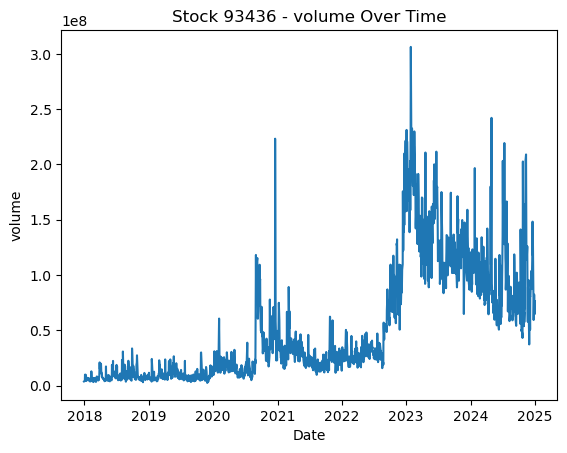

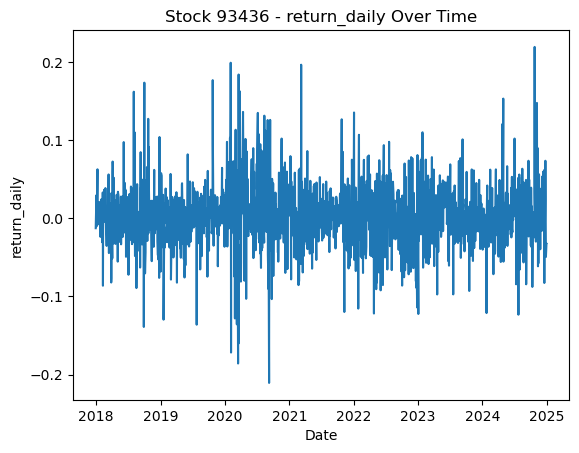

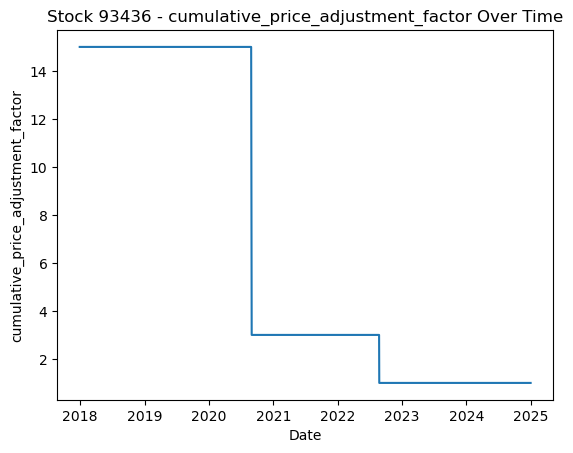

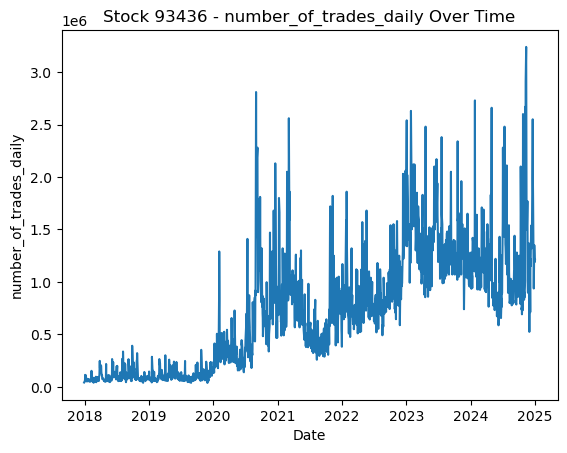

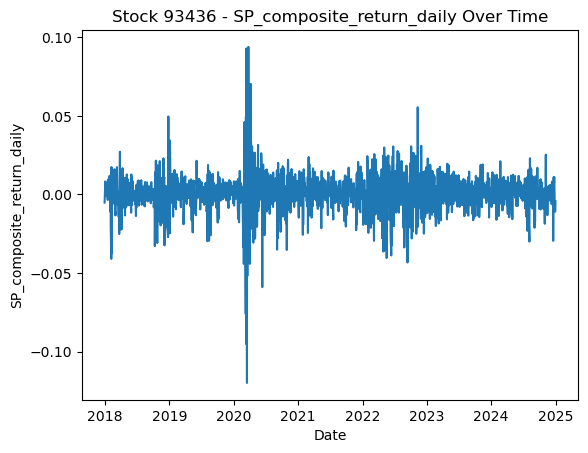

In [15]:
# Now, for each stock, and for each feature, we need to plot the feature over time and save the plot
for permno in all_stocks['PERMNO'].unique():
    stock_df = all_stocks[all_stocks['PERMNO'] == permno]
    stock_df.columns = ['stock_id', 'date', 'dividend_cash_amount', 'price', 'volume', 'return_daily', 'cumulative_price_adjustment_factor', 'number_of_trades_daily', 'SP_composite_return_daily']
    stock_df['date'] = pd.to_datetime(stock_df['date'])
    features = ['dividend_cash_amount', 'price', 'volume', 'return_daily', 'cumulative_price_adjustment_factor', 'number_of_trades_daily', 'SP_composite_return_daily']
    for feature in features:
        fig, ax = plt.subplots()
        ax.plot(pd.to_datetime(stock_df['date']), stock_df[feature].astype(float), linestyle='-')
        ax.set_xlabel('Date')
        ax.set_ylabel(feature)
        ax.set_title(f'Stock {permno} - {feature} Over Time')
        fig_filename = f'/Users/joshuachis/Documents/Berkeley MFE/Projects/JPMorgan Industry Project/JPMShortInterest_UCBMFE/data/stock_wrds/stock_{permno}_{feature}.png'
        fig.savefig(fig_filename)
        print(f"Plot saved to {fig_filename}")

In [1]:
BASE_URL = "https://www.alphavantage.co/query"       
ALPHA_API = '19OVA4WXXY5Q2VEH'                         

# Now we'll write a function that gets us daily stock data for a given symbol. 
def get_daily_stock_data(symbol, api_key=ALPHA_API, date_range=[None, None]):
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': symbol,
        'apikey': api_key,
        'outputsize': 'full' 
    }
    response = rqst.get(BASE_URL, params=params)
    data = response.json()
    if "Time Series (Daily)" not in data:
        raise ValueError("Error fetching data from Alpha Vantage API")
    time_series = data["Time Series (Daily)"]
    df = pd.DataFrame.from_dict(time_series, orient='index')
    df.index = pd.to_datetime(df.index)
    if date_range[0]:
        df = df[df.index >= pd.to_datetime(date_range[0])]
    if date_range[1]:
        df = df[df.index <= pd.to_datetime(date_range[1])]
    df = df.astype(float)
    df = df.sort_index()
    return df

In [ ]:
stocks = ['ISPR', 'QUBT', 'BHF', 'CART', 'TAIL', 'AMPG', 'ORMP', 'ATLX', 'FTII', 'PLTR', 'MHK', 'KMI', 'SPX', 'VIX']